<a href="https://colab.research.google.com/github/YejoongKwon/projects/blob/main/CORE_KOR_preGCAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#프로그램설치

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import gdown
import openpyxl

In [ ]:
!gdown --id 1-v89eqE2aYw1TdNp5_uuvhdlhcFALNfE
COREgcam=pd.read_csv('py_UCD_trn_data_CORE.csv',encoding='utf-8')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-v89eqE2aYw1TdNp5_uuvhdlhcFALNfE
To: /content/py_UCD_trn_data_CORE.csv
100% 1.06M/1.06M [00:00<00:00, 111MB/s]


#KOR passenger 데이터

In [ ]:
COREgcam.set_index("UCD_region", inplace = True)
CORE_kor= COREgcam.loc["Korea"]
CORE_kor=CORE_kor.reset_index()
CORE_kor.set_index("UCD_sector", inplace = True)
CORE_kor_pass= CORE_kor.loc["Passenger"]

In [ ]:
CORE_kor_pass = CORE_kor_pass.fillna(0)
CORE_kor_pass[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]] = CORE_kor_pass[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]].astype(int)
CORE_kor_pass

,UCD_region,mode,size.class,UCD_technology,UCD_fuel,variable,unit,2005,2010,2015,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
UCD_sector,,,,,,,,,,,,,,,,,,,,,
Passenger,Korea,LDV_2W,Motorcycle (50-250cc),All,All,annual travel per vehicle,vkt/veh/yr,3674,3674,3674,...,3674,3674,3674,3674,3674,3674,3674,3674,3674,3674
Passenger,Korea,LDV_4W,Subcompact Car,All,All,annual travel per vehicle,vkt/veh/yr,15353,15353,15353,...,15353,15353,15353,15353,15353,15353,15353,15353,15353,15353
Passenger,Korea,LDV_4W,Compact Car,All,All,annual travel per vehicle,vkt/veh/yr,15353,15353,15353,...,15353,15353,15353,15353,15353,15353,15353,15353,15353,15353
Passenger,Korea,LDV_4W,Large Car,All,All,annual travel per vehicle,vkt/veh/yr,15353,15353,15353,...,15353,15353,15353,15353,15353,15353,15353,15353,15353,15353
Passenger,Korea,LDV_4W,Light Truck and SUV,All,All,annual travel per vehicle,vkt/veh/yr,15353,15353,15353,...,15353,15353,15353,15353,15353,15353,15353,15353,15353,15353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Passenger,Korea,HSR,All,All,All,speed,km/hr,170,170,170,...,170,170,170,170,170,170,170,170,170,170
Passenger,Korea,LDV_2W,Motorcycle (50-250cc),All,All,speed,km/hr,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Passenger,Korea,LDV_4W,All,All,All,speed,km/hr,47,47,47,...,47,47,47,47,47,47,47,47,47,47


In [ ]:
CORE_kor_pass=CORE_kor_pass.reset_index()

#Pnf구하는과정(아웃풋:KOR_Pnf_Pass)

mode, size.class, UCD_technology, UCD_fuel 이 같으면 OPEX 합하기

In [ ]:
CORE_kor_pass_opex = CORE_kor_pass[CORE_kor_pass['variable'].str.contains('Operating|non-fuel OPEX')]
#drop CAPEX and non-fuel OPEX
CORE_kor_pass_opex = CORE_kor_pass_opex[CORE_kor_pass_opex.variable != "CAPEX and non-fuel OPEX"]
CORE_kor_pass_opex=CORE_kor_pass_opex.reset_index()
CORE_kor_pass_opex1=CORE_kor_pass_opex.groupby(['mode', 'size.class','UCD_technology','UCD_fuel'])["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"].apply(lambda x : x.astype(int).sum())

<ipython-input-8-47789aba41c9>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CORE_kor_pass_opex1=CORE_kor_pass_opex.groupby(['mode', 'size.class','UCD_technology','UCD_fuel'])["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"].apply(lambda x : x.astype(int).sum())


mode, size.class, UCD_technology, UCD_fuel 이 같으면 CAPEX 합하기

In [ ]:
CORE_kor_pass=CORE_kor_pass.reset_index()
CORE_kor_pass_CAPEX = CORE_kor_pass[CORE_kor_pass['variable'].str.contains('Capital costs|CAPEX')]
CORE_kor_pass_CAPEX=CORE_kor_pass_CAPEX.reset_index()
CORE_kor_pass_CAPEX1=CORE_kor_pass_CAPEX.groupby(['mode', 'size.class','UCD_technology','UCD_fuel'])["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"].apply(lambda x : x.astype(int).sum())
#CORE_kor_pass_CAPEX1

<ipython-input-9-6c1b627f0bef>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CORE_kor_pass_CAPEX1=CORE_kor_pass_CAPEX.groupby(['mode', 'size.class','UCD_technology','UCD_fuel'])["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"].apply(lambda x : x.astype(int).sum())


CORE_kor_pass_opex1 과 CORE_kor_pass_CAPEX1 합치기 = Pnf

In [ ]:
CORE_kor_pass_CAPEX1=CORE_kor_pass_CAPEX1.reset_index()
CORE_kor_pass_opex1=CORE_kor_pass_opex1.reset_index()
Pnf = CORE_kor_pass_opex1.set_index(['mode', 'size.class', 'UCD_technology','UCD_fuel']).add(CORE_kor_pass_CAPEX1.set_index(['mode', 'size.class', 'UCD_technology','UCD_fuel']), fill_value=0).reset_index()
Pnf=pd.DataFrame(Pnf)

LDV(2W와 4W)에 대해 (mode, size class)가 맞으면 annual travel per vehicle 을 Pnf에 나눠주기

In [ ]:
#분자(df1)
Pnf= Pnf.reset_index()
Pnf.set_index("mode",inplace = True)
Pnf_LDV= Pnf.loc[["LDV_2W","LDV_4W"]]
Pnf_LDV=Pnf_LDV.reset_index()
df1=Pnf_LDV
#분모(df2)
CORE_kor_pass=CORE_kor_pass.reset_index()
CORE_kor_pass.set_index("variable",inplace =True)
CORE_kor_pass_LDVannual= CORE_kor_pass.loc[["annual travel per vehicle"]]
CORE_kor_pass_LDVannual=CORE_kor_pass_LDVannual.reset_index()
df2=CORE_kor_pass_LDVannual

Pnf_LDV/CORE_kor_pass_LDVannual

In [ ]:
df1[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]] = df1[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]].astype(int)
df2[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]] = df2[["2005", "2010","2015","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100"]].astype(int)

In [ ]:
df1.set_index(["mode","size.class"],inplace = True)
df2.set_index(["mode","size.class"],inplace = True)

In [ ]:
df1.iloc[:,3:23]

2005    2010    2015   2020   2025   2030  \
mode   size.class                                                           
LDV_2W Motorcycle (50-250cc)    4680    4680    4680   4680   4680   4680   
       Motorcycle (50-250cc)    5209    5209    5209   5209   5209   5209   
LDV_4W Compact Car             51662   44503   37346  30189  29696  29204   
       Compact Car            105676   80329   54981  29633  29428  29223   
       Compact Car             22578   22121   21664  21207  20922  20635   
       Compact Car             19150   19150   19150  19150  19150  19150   
       Compact Car             21646   21646   21646  21646  21646  21646   
       Large Car               94841   81853   68865  55877  54983  54090   
       Large Car              184659  138209   91760  45310  45094  44878   
       Large Car               41693   40828   39965  39101  38800  38498   
       Large Car               36931   36931   36931  36931  36931  36931   
       Large Car               41806   41806   41806  41806  41806  41806   
       Light Truck and SUV    104357   89421   74485  59550  58521  57493   
       Light Truck and SUV    200594  151327  102060  52794  52410  52026   
       Light Truck and SUV     43259   42439   41619  40799  40287  39774   
       Light Truck and SUV     37108   37108   37108  37108  37108  37108   
       Light Truck and SUV     41980   41980   41980  41980  41980  41980   
       Subcompact Car          44022   37308   30593  23879  23416  22954   
       Subcompact Car          95648   71681   47713  23745  23550  23354   
       Subcompact Car          15817   15398   14979  14559  14297  14036   
       Subcompact Car          12674   12674   12674  12674  12674  12674   
       Subcompact Car          14297   14297   14297  14297  14297  14297   

                               2035   2040   2045   2050   2055   2060   2065  \
mode   size.class                                                               
LDV_2W Motorcycle (50-250cc)   4680   4680   4680   4680   4680   4680   4680   
       Motorcycle (50-250cc)   5209   5209   5209   5209   5209   5209   5209   
LDV_4W Compact Car            28711  28219  27726  27233  26741  26249  25757   
       Compact Car            29018  28768  28520  28271  28072  27874  27675   
       Compact Car            20349  20321  20293  20264  20245  20227  20208   
       Compact Car            19150  19150  19150  19150  19150  19150  19150   
       Compact Car            21646  21646  21646  21646  21646  21646  21646   
       Large Car              53197  52303  51410  50516  49622  48728  47836   
       Large Car              44661  44399  44135  43873  43664  43454  43245   
       Large Car              38197  38167  38136  38106  38087  38067  38047   
       Large Car              36931  36931  36931  36931  36931  36931  36931   
       Large Car              41806  41806  41806  41806  41806  41806  41806   
       Light Truck and SUV    56466  55438  54411  53383  52356  51328  50301   
       Light Truck and SUV    51642  51172  50702  50232  49862  49491  49121   
       Light Truck and SUV    39262  39210  39159  39108  39074  39040  39008   
       Light Truck and SUV    37108  37108  37108  37108  37108  37108  37108   
       Light Truck and SUV    41980  41980  41980  41980  41980  41980  41980   
       Subcompact Car         22492  22030  21569  21107  20645  20183  19720   
       Subcompact Car         23158  22921  22685  22449  22259  22069  21880   
       Subcompact Car         13774  13748  13721  13695  13679  13661  13644   
       Subcompact Car         12674  12674  12674  12674  12674  12674  12674   
       Subcompact Car         14297  14297  14297  14297  14297  14297  14297   

                               2070   2075   2080   2085   2090   2095   2100  
mode   size.class                                                              
LDV_2W Motorcycle (50-250cc)   4680   4680   4680   4680   4680   4680   4680 

In [ ]:
df2.iloc[:,8:28]

2005   2010   2015   2020   2025   2030   2035  \
mode   size.class                                                               
LDV_2W Motorcycle (50-250cc)   3674   3674   3674   3674   3674   3674   3674   
LDV_4W Subcompact Car         15353  15353  15353  15353  15353  15353  15353   
       Compact Car            15353  15353  15353  15353  15353  15353  15353   
       Large Car              15353  15353  15353  15353  15353  15353  15353   
       Light Truck and SUV    15353  15353  15353  15353  15353  15353  15353   

                               2040   2045   2050   2055   2060   2065   2070  \
mode   size.class                                                               
LDV_2W Motorcycle (50-250cc)   3674   3674   3674   3674   3674   3674   3674   
LDV_4W Subcompact Car         15353  15353  15353  15353  15353  15353  15353   
       Compact Car            15353  15353  15353  15353  15353  15353  15353   
       Large Car              15353  15353  15353  15353  15353  15353  15353   
       Light Truck and SUV    15353  15353  15353  15353  15353  15353  15353   

                               2075   2080   2085   2090   2095   2100  
mode   size.class                                                       
LDV_2W Motorcycle (50-250cc)   3674   3674   3674   3674   3674   3674  
LDV_4W Subcompact Car         15353  15353  15353  15353  15353  15353  
       Compact Car            15353  15353  15353  15353  15353  15353  
       Large Car              15353  15353  15353  15353  15353  15353  
       Light Truck and SUV    15353  15353  15353  15353  15353  15353

In [ ]:
common = df1.index.intersection(df2.index)
Pnf_LDV_united = df1.loc[common].iloc[:,3:23].div(df2.loc[common].iloc[:,8:28])

In [ ]:
Pnf_LDV_united=Pnf_LDV_united.reset_index()
df1=df1.reset_index()
Pnf_LDV_united = pd.concat([df1[['UCD_technology','UCD_fuel']], Pnf_LDV_united], axis=1)
Pnf_LDV_united

,UCD_technology,UCD_fuel,mode,size.class,2005,2010,2015,2020,2025,2030,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,BEV,Electricity,LDV_2W,Motorcycle (50-250cc),1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,...,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816
1,Liquids,Liquids,LDV_2W,Motorcycle (50-250cc),1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,...,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801
2,BEV,Electricity,LDV_4W,Compact Car,3.364945,2.898652,2.432489,1.966326,1.934215,1.902169,...,1.741744,1.709698,1.677653,1.645542,1.613496,1.581385,1.549274,1.517228,1.485117,1.485117
3,FCEV,Hydrogen,LDV_4W,Compact Car,6.883085,5.232137,3.581124,1.930111,1.916759,1.903407,...,1.828437,1.815541,1.802579,1.789748,1.776982,1.764215,1.751449,1.738813,1.726047,1.726047
4,Hybrid Liquids,Liquids,LDV_4W,Compact Car,1.470592,1.440826,1.411060,1.381294,1.362730,1.344037,...,1.318635,1.317462,1.316225,1.315118,1.313945,1.312773,1.311665,1.310623,1.309516,1.309516
5,Liquids,Liquids,LDV_4W,Compact Car,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,...,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313
6,NG,Natural Gas,LDV_4W,Compact Car,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,...,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887
7,BEV,Electricity,LDV_4W,Large Car,6.177359,5.331401,4.485443,3.639484,3.581254,3.523090,...,3.232072,3.173842,3.115743,3.057513,2.999284,2.941119,2.882889,2.824660,2.766430,2.766430
8,FCEV,Hydrogen,LDV_4W,Large Car,12.027552,9.002084,5.976682,2.951215,2.937146,2.923077,...,2.844004,2.830326,2.816713,2.803231,2.789683,2.776200,2.762848,2.749365,2.736013,2.736013
9,Hybrid Liquids,Liquids,LDV_4W,Large Car,2.715626,2.659285,2.603074,2.546799,2.527193,2.507523,...,2.480753,2.479450,2.478148,2.476910,2.475803,2.474565,2.473458,2.472220,2.471048,2.471048


원래 Pnf 의 LDV_2W인거와 LDV_4W인거 제외하고 다른 모든 모드 추출해서 Pnf_LDV_united 랑 pd.concat하기

In [ ]:
Pnf=Pnf.drop(['index'], axis=1)
Pnf_othermodes= Pnf.loc[["Air Domestic","Bus","HSR","Rail"]]
Pnf_othermodes=Pnf_othermodes.reset_index()
list(Pnf_othermodes.columns)

['mode',
 'size.class',
 'UCD_technology',
 'UCD_fuel',
 '2005',
 '2010',
 '2015',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100']

두 df의 컬럼 순서를 동일하게 하기

In [ ]:
Pnf_LDV_united=Pnf_LDV_united[list(Pnf_othermodes.columns)]
list(Pnf_LDV_united.columns)

['mode',
 'size.class',
 'UCD_technology',
 'UCD_fuel',
 '2005',
 '2010',
 '2015',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100']

In [ ]:
Pnf_othermodes

,mode,size.class,UCD_technology,UCD_fuel,2005,2010,2015,2020,2025,2030,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Air Domestic,All,Liquids,Liquids,12.0,12.0,11.0,11.0,11.0,11.0,...,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
1,Bus,All,Liquids,Liquids,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Bus,All,NG,Natural Gas,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,HSR,All,Electric,Electricity,69.0,65.0,61.0,57.0,57.0,57.0,...,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0
4,Rail,All,Electric,Electricity,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
5,Rail,All,Liquids,Liquids,30.0,30.0,30.0,30.0,30.0,30.0,...,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0


In [ ]:
Pnf_LDV_united

,mode,size.class,UCD_technology,UCD_fuel,2005,2010,2015,2020,2025,2030,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,LDV_2W,Motorcycle (50-250cc),BEV,Electricity,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,...,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816
1,LDV_2W,Motorcycle (50-250cc),Liquids,Liquids,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,...,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801
2,LDV_4W,Compact Car,BEV,Electricity,3.364945,2.898652,2.432489,1.966326,1.934215,1.902169,...,1.741744,1.709698,1.677653,1.645542,1.613496,1.581385,1.549274,1.517228,1.485117,1.485117
3,LDV_4W,Compact Car,FCEV,Hydrogen,6.883085,5.232137,3.581124,1.930111,1.916759,1.903407,...,1.828437,1.815541,1.802579,1.789748,1.776982,1.764215,1.751449,1.738813,1.726047,1.726047
4,LDV_4W,Compact Car,Hybrid Liquids,Liquids,1.470592,1.440826,1.411060,1.381294,1.362730,1.344037,...,1.318635,1.317462,1.316225,1.315118,1.313945,1.312773,1.311665,1.310623,1.309516,1.309516
5,LDV_4W,Compact Car,Liquids,Liquids,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,...,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313,1.247313
6,LDV_4W,Compact Car,NG,Natural Gas,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,...,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887,1.409887
7,LDV_4W,Large Car,BEV,Electricity,6.177359,5.331401,4.485443,3.639484,3.581254,3.523090,...,3.232072,3.173842,3.115743,3.057513,2.999284,2.941119,2.882889,2.824660,2.766430,2.766430
8,LDV_4W,Large Car,FCEV,Hydrogen,12.027552,9.002084,5.976682,2.951215,2.937146,2.923077,...,2.844004,2.830326,2.816713,2.803231,2.789683,2.776200,2.762848,2.749365,2.736013,2.736013
9,LDV_4W,Large Car,Hybrid Liquids,Liquids,2.715626,2.659285,2.603074,2.546799,2.527193,2.507523,...,2.480753,2.479450,2.478148,2.476910,2.475803,2.474565,2.473458,2.472220,2.471048,2.471048


In [ ]:
KOR_Pnf_Pass = pd.concat([Pnf_othermodes, Pnf_LDV_united])
KOR_Pnf_Pass

,mode,size.class,UCD_technology,UCD_fuel,2005,2010,2015,2020,2025,2030,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Air Domestic,All,Liquids,Liquids,12.000000,12.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
1,Bus,All,Liquids,Liquids,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Bus,All,NG,Natural Gas,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,HSR,All,Electric,Electricity,69.000000,65.000000,61.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
4,Rail,All,Electric,Electricity,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
5,Rail,All,Liquids,Liquids,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
0,LDV_2W,Motorcycle (50-250cc),BEV,Electricity,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,...,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816,1.273816
1,LDV_2W,Motorcycle (50-250cc),Liquids,Liquids,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,...,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801,1.417801
2,LDV_4W,Compact Car,BEV,Electricity,3.364945,2.898652,2.432489,1.966326,1.934215,1.902169,...,1.741744,1.709698,1.677653,1.645542,1.613496,1.581385,1.549274,1.517228,1.485117,1.485117
3,LDV_4W,Compact Car,FCEV,Hydrogen,6.883085,5.232137,3.581124,1.930111,1.916759,1.903407,...,1.828437,1.815541,1.802579,1.789748,1.776982,1.764215,1.751449,1.738813,1.726047,1.726047


# Pjsirt 산출

#데이터 가져오기

Pnf(unit:$/VKT)데이터: KOR_Pnf_Pass

In [ ]:
KOR_Pnf=KOR_Pnf_Pass

Pfuel(unit:$/GJ) 데이터 가져오기

In [ ]:
!gdown --id 1-qIVpiQygVYbjeD9N2R-W5gcFo6P0p6k
Pfuelcols= ['region','fuel','1990','2005','2010','2015','2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100','unit']

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-qIVpiQygVYbjeD9N2R-W5gcFo6P0p6k
To: /content/8. fuel prices.xlsx
100% 11.8k/11.8k [00:00<00:00, 11.8MB/s]


In [ ]:
Pfuel =pd.read_excel('8. fuel prices.xlsx', sheet_name = 0, header=None)
Pfuel.set_axis(Pfuelcols,axis=1,inplace=True)
#Pfuel

In [ ]:
Pfuel.iloc[:,2:23]=Pfuel.iloc[:,2:23].astype(int)

Pfuel의 unit을 $/MJ로 바꾸기

In [ ]:
Pfuel.iloc[:,2:23]=Pfuel.iloc[:,2:23]/1000

EI데이터 가져오기(unit:MJ/VKM)

In [ ]:
CORE_kor_pass=CORE_kor_pass.reset_index()
CORE_kor_pass.set_index("variable", inplace = True)
CORE_kor_pass_EI= CORE_kor_pass.loc["intensity"]

#기술별비용 산정

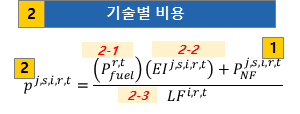

CORE_kor_pass_EI 에 minicam.energy.input 컬럼 추가하기\
인덱스: mode, size_class, UCD_technology, UCD_fuel

In [ ]:
#fuel mapping 데이터 불러오기
!gdown --id 1-s9pElYhgn7wu1bum6Egz3UU3R8mix4A
fuel_mapping=pd.read_csv('(FUEL MAPPING)UCD_techs_revised.csv',encoding='cp949')
fuel_mapping.set_index(["mode","size.class","UCD_technology","UCD_fuel"],inplace=True)
#row 수 확인
fuel_mapping#203

In [ ]:
CORE_kor_pass_EI1=CORE_kor_pass_EI.set_index(["mode","size.class","UCD_technology","UCD_fuel"])

In [ ]:
CORE_kor_pass_EI1

In [ ]:
#index 기준으로 CORE_kor_pass_EI와 fuel_mapping['minicam.energy.input']을 join
EI_mapped = pd.merge(CORE_kor_pass_EI1,fuel_mapping['minicam.energy.input'],left_index=True,right_index=True,how='left')
EI_mapped=EI_mapped.reset_index()

In [ ]:
#index 기준으로 CORE_kor_pass_EI와 fuel_mapping['minicam.energy.input']을 join
EI_mapped = pd.merge(CORE_kor_pass_EI1,fuel_mapping,left_index=True,right_index=True, how='left')
EI_mapped=EI_mapped.reset_index()
EI_mapped

In [ ]:
Pfuel.set_index("region",inplace = True)
Pfuel_KOR=Pfuel.loc["South Korea"]
Pfuel_KOR=Pfuel_KOR.reset_index()

EI_mapped.iloc[:,6:26]과 Pfuel_KOR.iloc[:,3:23] 를 곱해야 함\
(인덱스) minicam.energy.input/fuel

In [ ]:
EI_mapped.set_index(["minicam.energy.input"],inplace = True)
Pfuel_KOR.set_index(["fuel"],inplace = True)

In [ ]:
reorderlist = ['H2 retail dispensing', 'delivered gas','elect_td_trn' ,'refined liquids enduse']
EI_mapped_ordered = EI_mapped.iloc[pd.Categorical(EI_mapped.index,reorderlist).argsort()]

In [ ]:
Pfuel_KOR.iloc[:,2:22]

,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
fuel,,,,,,,,,,,,,,,,,,,,
H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014
H2 wholesale dispensing,0.000,0.000,0.000,0.014,0.014,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013
delivered coal,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
delivered gas,0.002,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.004
elect_td_trn,0.011,0.011,0.011,0.011,0.011,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.009,0.009,0.009,0.009,0.009,0.009
refined liquids enduse,0.003,0.006,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.006,0.006


In [ ]:
EI_mapped_ordered.iloc[:,9:29]

,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
minicam.energy.input,,,,,,,,,,,,,,,,,,,,
H2 retail dispensing,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
H2 retail dispensing,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
H2 retail dispensing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
H2 retail dispensing,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
delivered gas,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1
delivered gas,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1
delivered gas,4,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2
delivered gas,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
delivered gas,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
commonfuel_ver2 = EI_mapped_ordered.index.intersection(Pfuel_KOR.index)
Pfuel_multiply_intensity_ver2 = EI_mapped_ordered.loc[commonfuel_ver2].iloc[:,9:29].mul(Pfuel_KOR.loc[commonfuel_ver2].iloc[:,2:22])
Pfuel_multiply_intensity_ver2

,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014
H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014
delivered gas,0.004,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.003,0.003,0.003,0.003,0.004,0.004
delivered gas,0.004,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.004
delivered gas,0.008,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.006,0.006,0.006,0.006,0.006,0.006,0.008,0.008
delivered gas,0.010,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.020,0.020
delivered gas,0.006,0.009,0.009,0.009,0.009,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.008,0.008
elect_td_trn,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
#Pfuel_multiply_intensity_ver2에다가 EI_mapped_ordered 의 컬럼인 mode, size.class, UCD_technology,UCD_fuel을 붙이기(순서 그대로)
Pfuel_multiplied = pd.concat([Pfuel_multiply_intensity_ver2, EI_mapped_ordered[['mode','size.class','UCD_technology','UCD_fuel','unit']]],axis=1)
Pfuel_multiplied=Pfuel_multiplied.reset_index()
Pfuel_multiplied

,index,2005,2010,2015,2020,2025,2030,2035,2040,2045,...,2080,2085,2090,2095,2100,mode,size.class,UCD_technology,UCD_fuel,unit
0,H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,...,0.000,0.000,0.000,0.000,0.000,LDV_4W,Compact Car,FCEV,Hydrogen,MJ/vkm
1,H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,LDV_4W,Subcompact Car,FCEV,Hydrogen,MJ/vkm
2,H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,...,0.014,0.014,0.014,0.014,0.014,LDV_4W,Large Car,FCEV,Hydrogen,MJ/vkm
3,H2 retail dispensing,0.000,0.000,0.000,0.016,0.016,0.015,0.015,0.015,0.014,...,0.014,0.014,0.014,0.014,0.014,LDV_4W,Light Truck and SUV,FCEV,Hydrogen,MJ/vkm
4,delivered gas,0.004,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,...,0.003,0.003,0.003,0.004,0.004,LDV_4W,Compact Car,NG,Natural Gas,MJ/vkm
5,delivered gas,0.004,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.003,...,0.003,0.003,0.003,0.004,0.004,LDV_4W,Subcompact Car,NG,Natural Gas,MJ/vkm
6,delivered gas,0.008,0.009,0.009,0.009,0.009,0.009,0.009,0.009,0.009,...,0.006,0.006,0.006,0.008,0.008,LDV_4W,Light Truck and SUV,NG,Natural Gas,MJ/vkm
7,delivered gas,0.010,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,...,0.015,0.015,0.015,0.020,0.020,Bus,All,NG,Natural Gas,MJ/vkm
8,delivered gas,0.006,0.009,0.009,0.009,0.009,0.006,0.006,0.006,0.006,...,0.006,0.006,0.006,0.008,0.008,LDV_4W,Large Car,NG,Natural Gas,MJ/vkm
9,elect_td_trn,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,LDV_4W,Compact Car,BEV,Electricity,MJ/vkm


In [ ]:
#Pfuel_multiplied 의 ['index'] 칼럼의 이름을 minicam.energy.input으로 바꾸기
Pfuel_multiplied=Pfuel_multiplied.rename(columns = {'index':'minicam.energy.input'})
#EI_mapped_ordered 인덱스해제
EI_mapped_ordered=EI_mapped_ordered.reset_index()

In [ ]:
EI_mapped_ordered=EI_mapped_ordered.drop(columns=['level_0', 'index','UCD_region','unit','UCD_sector_x', 'UCD_sector_y','UCD_category','UCD_region','supplysector','tranSubsector','tranTechnology','fuel'])

In [ ]:
Pfuel_multiplied=Pfuel_multiplied[list(EI_mapped_ordered.columns)]

KOR_Pnf 와 Pfuel_multiplied 를 합하기

In [ ]:
Pfuel_multiplied=Pfuel_multiplied.drop(['minicam.energy.input'],axis=1)
Pfuel_multiplied

,mode,size.class,UCD_technology,UCD_fuel,2005,2010,2015,2020,2025,2030,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,LDV_4W,Compact Car,FCEV,Hydrogen,0.000,0.000,0.000,0.016,0.016,0.015,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,LDV_4W,Subcompact Car,FCEV,Hydrogen,0.000,0.000,0.000,0.016,0.016,0.015,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,LDV_4W,Large Car,FCEV,Hydrogen,0.000,0.000,0.000,0.016,0.016,0.015,...,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014
3,LDV_4W,Light Truck and SUV,FCEV,Hydrogen,0.000,0.000,0.000,0.016,0.016,0.015,...,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.014
4,LDV_4W,Compact Car,NG,Natural Gas,0.004,0.006,0.006,0.006,0.006,0.006,...,0.006,0.006,0.006,0.006,0.003,0.003,0.003,0.003,0.004,0.004
5,LDV_4W,Subcompact Car,NG,Natural Gas,0.004,0.006,0.006,0.006,0.006,0.006,...,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.004,0.004
6,LDV_4W,Light Truck and SUV,NG,Natural Gas,0.008,0.009,0.009,0.009,0.009,0.009,...,0.009,0.009,0.006,0.006,0.006,0.006,0.006,0.006,0.008,0.008
7,Bus,All,NG,Natural Gas,0.010,0.015,0.015,0.015,0.015,0.015,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.020,0.020
8,LDV_4W,Large Car,NG,Natural Gas,0.006,0.009,0.009,0.009,0.009,0.006,...,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.008,0.008
9,LDV_4W,Compact Car,BEV,Electricity,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#Pfuel_multiplied 의 모드순서를 KOR_Pnf와 맞추기

In [ ]:
Pfuel_multiplied.set_index('mode',inplace=True)
reorderlist2 = ['Air Domestic', 'Bus','HSR' ,'Rail','LDV_2W','LDV_4W']
Pfuel_multiplied_ordered = Pfuel_multiplied.iloc[pd.Categorical(Pfuel_multiplied.index,reorderlist2).argsort()]

In [ ]:
Pfuel_multiplied=Pfuel_multiplied.reset_index()
Pfuel_multiplied=Pfuel_multiplied.sort_values(by=['mode','size.class','UCD_technology'])
KOR_Pnf=KOR_Pnf.sort_values(by=['mode','size.class','UCD_technology'])

In [ ]:
Pfuel_multipliedd=Pfuel_multiplied.drop_duplicates()
Pfuel_multipliedd.set_index('mode',inplace=True)
Pfuel_multipliedd = Pfuel_multipliedd.drop(['Air International'])
Pfuel_multipliedd=Pfuel_multipliedd.reset_index()

In [ ]:
#CORE_kor_pass_EI2= CORE_kor_pass_EI.reset_index()
CORE_kor_pass_EI2=CORE_kor_pass_EI.sort_values(by=['mode','size.class','UCD_technology'])

In [ ]:
CORE_kor_pass_EI2.set_index('mode',inplace=True)
CORE_kor_pass_EId = CORE_kor_pass_EI2.drop(['Air International'])
CORE_kor_pass_EId=CORE_kor_pass_EId.reset_index()
CORE_kor_pass_EId

,mode,level_0,index,UCD_sector,UCD_region,size.class,UCD_technology,UCD_fuel,unit,2005,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Air Domestic,107,107,Passenger,Korea,All,Liquids,Liquids,MJ/vkm,383,...,279,279,279,279,279,279,279,279,279,279
1,Bus,109,109,Passenger,Korea,All,Liquids,Liquids,MJ/vkm,5,...,5,5,5,5,5,5,5,5,5,5
2,Bus,110,110,Passenger,Korea,All,NG,Natural Gas,MJ/vkm,5,...,5,5,5,5,5,5,5,5,5,5
3,HSR,111,111,Passenger,Korea,All,Electric,Electricity,MJ/vkm,91,...,90,90,89,89,89,89,89,89,89,89
4,LDV_2W,113,113,Passenger,Korea,Motorcycle (50-250cc),BEV,Electricity,MJ/vkm,0,...,0,0,0,0,0,0,0,0,0,0
5,LDV_2W,112,112,Passenger,Korea,Motorcycle (50-250cc),Liquids,Liquids,MJ/vkm,1,...,1,0,0,0,0,0,0,0,0,0
6,LDV_4W,122,122,Passenger,Korea,Compact Car,BEV,Electricity,MJ/vkm,0,...,0,0,0,0,0,0,0,0,0,0
7,LDV_4W,123,123,Passenger,Korea,Compact Car,FCEV,Hydrogen,MJ/vkm,1,...,0,0,0,0,0,0,0,0,0,0
8,LDV_4W,120,120,Passenger,Korea,Compact Car,Hybrid Liquids,Liquids,MJ/vkm,2,...,1,1,1,1,1,1,1,1,1,1
9,LDV_4W,119,119,Passenger,Korea,Compact Car,Liquids,Liquids,MJ/vkm,2,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
CORE_kor_pass=CORE_kor_pass.reset_index()
CORE_kor_pass.set_index("variable",inplace =True)
CORE_kor_pass_LF= CORE_kor_pass.loc[["load factor"]]
CORE_kor_pass_LF2=CORE_kor_pass_LF.sort_values(by=['mode','size.class','UCD_technology'])

CORE_kor_pass_LF2.set_index('mode',inplace=True)
CORE_kor_pass_LF2 = CORE_kor_pass_LF2.drop(['Air International'])
CORE_kor_pass_LF2=CORE_kor_pass_LF2.reset_index()
CORE_kor_pass_LF2

,mode,level_0,index,UCD_sector,UCD_region,size.class,UCD_technology,UCD_fuel,unit,2005,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Air Domestic,136,136,Passenger,Korea,All,Liquids,Liquids,pers/veh,122,...,143,143,143,143,143,143,143,143,143,143
1,Bus,138,138,Passenger,Korea,All,Liquids,Liquids,pers/veh,9,...,9,9,9,9,9,9,9,9,9,9
2,Bus,139,139,Passenger,Korea,All,NG,Natural Gas,pers/veh,9,...,9,9,9,9,9,9,9,9,9,9
3,HSR,140,140,Passenger,Korea,All,Electric,Electricity,pers/veh,155,...,155,155,155,155,155,155,155,155,155,155
4,LDV_2W,142,142,Passenger,Korea,Motorcycle (50-250cc),BEV,Electricity,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1
5,LDV_2W,141,141,Passenger,Korea,Motorcycle (50-250cc),Liquids,Liquids,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1
6,LDV_4W,151,151,Passenger,Korea,Compact Car,BEV,Electricity,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1
7,LDV_4W,152,152,Passenger,Korea,Compact Car,FCEV,Hydrogen,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1
8,LDV_4W,149,149,Passenger,Korea,Compact Car,Hybrid Liquids,Liquids,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1
9,LDV_4W,148,148,Passenger,Korea,Compact Car,Liquids,Liquids,pers/veh,1,...,1,1,1,1,1,1,1,1,1,1


#Pjsirt산출

In [ ]:
CORE_kor_pass_LF3=CORE_kor_pass_LF2.drop(columns=['level_0', 'index','UCD_sector','UCD_region','unit'])

In [ ]:
CORE_kor_pass_LF3

#Lets export

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#CORE_kor_pass_opex1(VEH 변환전)
#CORE_kor_pass_CAPEX1(VEH 변환전)
#KOR_Pnf_Pass(단위변환완료)

#KOR_Pnf
KOR_Pnf.to_excel(excel_writer=r'/content/gdrive/MyDrive/GCAM전처리/CORE__KOR_Passenger_Pnf.xlsx')

#Fuel price*intensity
Pfuel_multipliedd.to_excel(excel_writer=r'/content/gdrive/MyDrive/GCAM전처리/CORE__KOR_Passenger_FPI.xlsx')
#load factor
CORE_kor_pass_LF3.to_excel(excel_writer=r'/content/gdrive/MyDrive/GCAM전처리/CORE__KOR_Passenger_LF.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
